<a href="https://colab.research.google.com/github/swatimaurya19/ALPR_PROJECT-/blob/main/ALPR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/swatimaurya19/ALPR_PROJECT-.git
%cd ALPR_PROJECT-

Cloning into 'ALPR_PROJECT-'...
/content/ALPR_PROJECT-


In [2]:
!git checkout -b feature-branch

# Push the new branch to GitHub
!git push -u origin feature-branch

Switched to a new branch 'feature-branch'
error: src refspec feature-branch does not match any
error: failed to push some refs to 'https://github.com/swatimaurya19/ALPR_PROJECT-.git'


In [ ]:
pip install pytesseract

In [ ]:
pip install opencv-python

In [ ]:
import os
import glob
import cv2
import pytesseract
import zipfile


# Install Tesseract
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

# Path to the ZIP file (adjusted path)
zip_file_path = '/content/drive/MyDrive/license-plates/archive (3).zip'
extract_folder = os.path.join('/content', "extracted_images")

# Verify the file exists
if not os.path.isfile(zip_file_path):
    print(f"File not found: {zip_file_path}")
else:
    # Create directory to extract images
    os.makedirs(extract_folder, exist_ok=True)

    # Extract ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    # Define the path pattern for images
    path_for_license_plates = os.path.join(extract_folder, "**/*.png")

    # Lists to store actual and predicted license plates
    list_license_plates = []
    predicted_license_plates = []

    # Process each image file
    for path_to_license_plate in glob.glob(path_for_license_plates, recursive=True):
        license_plate_file = os.path.basename(path_to_license_plate)
        license_plate, _ = os.path.splitext(license_plate_file)

        # Append the actual license plate to the list
        list_license_plates.append(license_plate)

        # Read each license plate image file using OpenCV
        img = cv2.imread(path_to_license_plate)

        # Image preprocessing
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
        _, thresh_img = cv2.threshold(blurred_img, 128, 255, cv2.THRESH_BINARY_INV)

        # Pass the preprocessed image to the Tesseract OCR engine
        predicted_result = pytesseract.image_to_string(
            thresh_img,
            lang='eng',
            config='--oem 1 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        )

        # Filter the predicted result
        filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")

        # Append the filtered predicted result to the list
        predicted_license_plates.append(filter_predicted_result)

        # Debugging information
        print(f"Image file: {license_plate_file}")
        print(f"Actual plate: {license_plate}")
        print(f"Predicted result: {predicted_result}")
        print(f"Filtered result: {filter_predicted_result}")
        print("---")

    # Print header for accuracy results
    print("Actual License Plate", "\t", "Predicted License Plate" )
    print("--------------------", "\t", "-----------------------")

    # Function to calculate and print predicted accuracy
    def calculate_predicted_accuracy(actual_list, predicted_list):
        if len(actual_list) != len(predicted_list):
            print("Error: The length of actual and predicted lists does not match.")
            return

        for actual_plate, predict_plate in zip(actual_list, predicted_list):
            accuracy = "100%"
            num_matches = 0
            if actual_plate == predict_plate:
                accuracy = "100 %"
            else:
                if len(actual_plate) == len(predict_plate):
                    for a, p in zip(actual_plate, predict_plate):
                        if a == p:
                            num_matches += 1
                    accuracy = str(round((num_matches / len(actual_plate)) * 100, 2)) + "%"
            print(actual_plate, "\t\t\t", predict_plate, "\t\t ", accuracy)

    # Call the function to calculate and print accuracy
    calculate_predicted_accuracy(list_license_plates, predicted_license_plates)


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 128 kB in 2s (83.8 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (

In [ ]:
# Path to the ZIP file in Google Drive
zip_file_path = '/content/drive/MyDrive/license-plates/archive (3).zip'
extract_folder = '/content/images/'

# Create extraction folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to: {extract_folder}")

Files extracted to: /content/images/


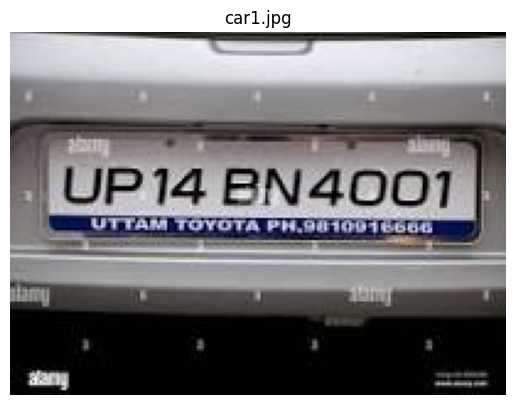

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Specify the image file path
image_file_path = '/content/drive/MyDrive/license-plates/car1.jpg'  # Replace with actual image file path

# Read the image using OpenCV
test_license_plate = cv2.imread(image_file_path)

# Check if the image was loaded successfully
if test_license_plate is None:
    print("Error: Image not found or cannot be loaded.")
else:
    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(test_license_plate, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(os.path.basename(image_file_path))
    plt.show()



In [ ]:
resize_test_license_plate = cv2.resize(
	test_license_plate, None, fx = 2, fy = 2,
	interpolation = cv2.INTER_CUBIC)


In [ ]:
grayscale_resize_test_license_plate = cv2.cvtColor(
	resize_test_license_plate, cv2.COLOR_BGR2GRAY)


In [ ]:
gaussian_blur_license_plate = cv2.GaussianBlur(
	grayscale_resize_test_license_plate, (5, 5), 0)


In [ ]:
new_predicted_result_GWT2180 = pytesseract.image_to_string(
    gaussian_blur_license_plate,
    lang='eng',
    config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
)

filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)



UPI4BNG001
